<div style="text-align: center; margin: 0;">
  <img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" alt="UNAD Logo" style="max-width: 100%; height: auto;">
</div>

<p align="center">Curso: Machine Learning</p>

<p align="center"> Código Curso: 203008067 </p>

<p align="center"> Grupo: 203008067_15</p>

 <p align="center"> Fase 3 - Componente práctico - Prácticas simuladas</p>

 <p align="center">  Presentado por: Deiver Enrique Alfonso Cortes</p>

 <p align="center">  Tutor(a): Isaac Esteban Camargo Freile </p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> 17 de julio 2024</p>


<!-- Estilos globales -->
<style>
    * {
        margin: 10px 0; /* Margenes para todos los elementos */
    }
    ul li {
        font-size: 15px;
    }
</style>

<h2>Información acerca del dataset.</h2>
<p>Columnas o variables que contiene el dataset <em>productividad_confeccion.csv</em></p>
<ul>
    <li><strong>date:</strong> Fecha en MM-DD-YYYY</li>
    <li><strong>day:</strong> Día de la semana.</li>
    <li><strong>quarter:</strong> Cuarto del mes. Un mes se dividió en cuatro partes.</li>
    <li><strong>department:</strong> Departamento asociado a la instancia.</li>
    <li><strong>team_no:</strong> Número de equipo asociado con la instancia.</li>
    <li><strong>no_of_workers:</strong> Número de trabajadores en cada equipo.</li>
    <li><strong>no_of_style_change:</strong> Número de cambios en el estilo de un producto.</li>
    <li><strong>targeted_productivity:</strong> Productividad objetivo establecida por la Autoridad para cada equipo en cada día.</li>
    <li><strong>smv:</strong> Valor Minuto Estándar, es el tiempo asignado para una tarea.</li>
    <li><strong>wip:</strong> Trabajo en progreso. Incluye la cantidad de elementos sin terminar por productos.</li>
    <li><strong>over_time:</strong> Representa la cantidad de tiempo extra de cada equipo en minutos.</li>
    <li><strong>incentive:</strong> Representa la cantidad de incentivo financiero (en BDT) que permite o motiva un curso de acción particular.</li>
    <li><strong>idle_time:</strong> La cantidad de tiempo que la producción estuvo interrumpida por varias razones.</li>
    <li><strong>idle_men:</strong> El número de trabajadores que estuvieron inactivos debido a la interrupción de la producción.</li>
    <li><strong>actual_productivity:</strong> Porcentaje real de productividad que entregaron los trabajadores.</li>
</ul>



<h2>Exploración de los datos</h2>

In [97]:
# Importación de librerías de uso global.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Carga del dataset.
df = pd.read_csv('data/productividad_confeccion.csv')
# Visualización del dataset.
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [99]:
# Exploración inicial
print("Tipos de datos:\n", df.dtypes)
# Eliminar espacios en los nombres de las columnas (si los hay)
df.columns = df.columns.str.strip()
# Shape del dataframe
print('shape dataframe:', df.shape)

Tipos de datos:
 date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object
shape dataframe: (1197, 15)


## Aplicación modelos lineales.
- a. Seleccionar una base de entrenamiento (80%) y una base de prueba (20%).
- b. Con la base de entrenamiento aplicar un modelo de regresión lineal para predecir la productividad real a partir del número de trabajadores de cada equipo y el tiempo extra en minutos.
- c. Realizar las predicciones sobre la base de prueba.
- d. Con los resultados del ítem anterior, realizar un diagrama de dispersión, en el eje X ubicar los valores predichos y en el eje Y ubicar los valores de productividad real.

<h2>Procesamiento de datos</h2>

In [100]:
from sklearn.model_selection import train_test_split
# Preparación de los datos
# Copia del dataset para regresión lineal, solo con las columnas necesarias.
df_rl = df[["no_of_workers", "over_time", "actual_productivity"]].copy()
# División del Dataset
X_rl = df_rl[["no_of_workers", "over_time"]]
y_rl_real = df_rl["actual_productivity"]

# Punto a. Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_rl_train, X_rl_test, y_rl_train, y_rl_test = train_test_split(
    X_rl, y_rl_real, test_size=0.2, random_state=42
)

<h2>Entrenamiento del modelo</h2>

In [101]:
from sklearn.linear_model import LinearRegression

# Punto b. Aplicación del Modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_rl_train, y_rl_train)

# Punto c. Realización de Predicciones sobre test
y_rl_pred_test = model.predict(X_rl_test)
print(y_rl_pred_test)

[0.72911833 0.73355348 0.74454834 0.74507799 0.74507799 0.72895079
 0.74242975 0.74242975 0.71857136 0.72442431 0.7234855  0.73481075
 0.72113849 0.74161144 0.71857136 0.74454834 0.72945628 0.72778293
 0.72425613 0.71830356 0.72962477 0.73310824 0.74413919 0.74161144
 0.74079909 0.71964258 0.74320038 0.7220773  0.72536311 0.74320038
 0.7225467  0.73287354 0.74038397 0.74460859 0.71776795 0.7227814
 0.74179218 0.72113849 0.73287354 0.74507799 0.71618497 0.71723234
 0.74507799 0.71883917 0.73334294 0.73287354 0.74507799 0.74507799
 0.73069008 0.74454834 0.72996176 0.72107229 0.74507799 0.71750015
 0.74507799 0.72015136 0.74242975 0.72472553 0.74320038 0.74281507
 0.74454834 0.74454834 0.71961576 0.74079909 0.7214874  0.74507799
 0.73069008 0.73547281 0.72160789 0.72067505 0.71750015 0.74190011
 0.72160789 0.7234855  0.72137319 0.71857136 0.72321472 0.7218426
 0.74320038 0.73618384 0.72551404 0.73613487 0.72160789 0.74454834
 0.71830356 0.72113849 0.7234855  0.74454834 0.72137319 0.722077

<h2>Evaluación del modelo</h2>

In [102]:
from sklearn.metrics import r2_score, mean_squared_error

# Calcular R^2
r2 = r2_score(y_rl_test, y_rl_pred_test)
# Calcular MSE
mse = mean_squared_error(y_rl_test, y_rl_pred_test)
# Calcular RMSE
rmse = np.sqrt(mse)

print("R^2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R^2: -0.002414116085998952
MSE: 0.026616567260178005
RMSE: 0.16314584659187006


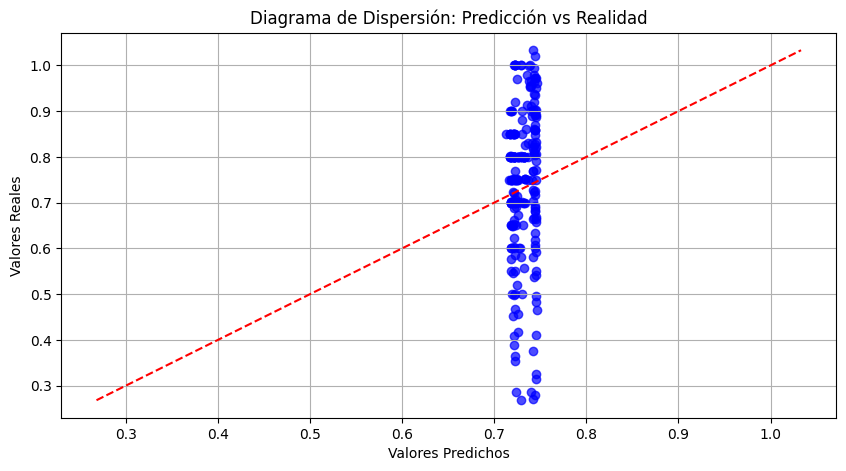

In [103]:
# Punto d. Visualización de los Resultados
plt.figure(figsize=(10, 5))
plt.scatter(y_rl_pred_test, y_rl_test, alpha=0.7, color="b")
plt.xlabel("Valores Predichos")
plt.ylabel("Valores Reales")
plt.title("Diagrama de Dispersión: Predicción vs Realidad")

# Línea diagonal de referencia
min_val = min(min(y_rl_pred_test), min(y_rl_test))
max_val = max(max(y_rl_pred_test), max(y_rl_test))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.grid(True)
plt.show()

# Acción 2: Aplicación modelo logístico.

- a. Construir la variable ‘nivel_productividad’ con niveles alto y bajo. Considere nivel alto a productividad real > 0.7 y nivel bajo a productividad real <=0.7.
- b. Con la base de entrenamiento aplicar un modelo de regresión logística para predecir el ‘nivel_productividad’ basado en el número de trabajadores de cada equipo y el tiempo extra en minutos.
- c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

<h2>Procesamiento de datos</h2>

In [104]:
# Preparación de los datos
# Copia de dataset para regresión logistica.
df_rlog = df[["no_of_workers", "over_time", "actual_productivity"]].copy()

# Punto a. Agregar columna 'nivel_productividad'
def calculate_productivity_level(productivity):
    if productivity > 0.7:
        return "alto"
    else:
        return "bajo"

df_rlog["nivel_productividad"] = df_rlog["actual_productivity"].apply(
    calculate_productivity_level
)

# Convertir la variable categórica 'nivel_productividad' a numérica
# Asignar de los valores numéricos a 'nivel_productividad'
# Solamente es un columna con dos valores categoricos, se puede realizar manual sin usar get_dummies para convertir a dummy
df_rlog["nivel_productividad_num"] = df_rlog["nivel_productividad"].map(
    {"bajo": 0, "alto": 1}
)

# Verificar la nueva columna
df_rlog.tail(10)

,no_of_workers,over_time,actual_productivity,nivel_productividad,nivel_productividad_num
1187,59.0,7080,0.750051,alto,1
1188,58.0,6960,0.700557,alto,1
1189,57.0,6840,0.700505,alto,1
1190,38.0,4560,0.700246,alto,1
1191,57.0,6840,0.650596,bajo,0
1192,8.0,960,0.628333,bajo,0
1193,8.0,960,0.625625,bajo,0
1194,8.0,960,0.625625,bajo,0
1195,15.0,1800,0.505889,bajo,0
1196,6.0,720,0.394722,bajo,0


In [105]:
# Explorando la variable target 'nivel_productividad'
df_rlog['nivel_productividad'].value_counts()

nivel_productividad
alto    831
bajo    366
Name: count, dtype: int64

In [106]:
# Verificando los valores nulos
df_rlog.isnull().sum()

no_of_workers              0
over_time                  0
actual_productivity        0
nivel_productividad        0
nivel_productividad_num    0
dtype: int64

In [107]:
from sklearn.model_selection import train_test_split

# Seleccionar las variables independientes y la variable dependiente
X_rlog = df_rlog[["no_of_workers", "over_time"]]
y_rlog = df_rlog["nivel_productividad_num"]

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_rlog_train, X_rlog_test, y_rlog_train, y_rlog_test = train_test_split(
    X_rlog, y_rlog, test_size=0.2, random_state=42
)

<h2>Entrenamiento del modelo</h2>

In [108]:
from sklearn.linear_model import LogisticRegression
# Punto b. Crear y entrenar el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_rlog_train, y_rlog_train)

# Punto C. Predicciones
y_rlog_pred = logistic_model.predict(X_rlog_test)

# Objecto de coversion numerico - text
nivel_productividad_num_to_text = {0: "bajo", 1: "alto"}
y_rlog_pred_text = [nivel_productividad_num_to_text[val] for val in y_rlog_pred]
print(y_rlog_pred_text)

['alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto',

<h2>Evaluación del modelo</h2>

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Matriz de Confusión
cm = confusion_matrix(y_rlog_test, y_rlog_pred)
print("Matriz de Confusión:")
print(cm)

# Precisión del modelo (accuracy)
accuracy = accuracy_score(y_rlog_test, y_rlog_pred)
print("Precisión del modelo de regresión logística:", accuracy)

Matriz de Confusión:
[[  0  70]
 [  0 170]]
Precisión del modelo de regresión logística: 0.7083333333333334


# Acción 3: Aplicación K-NN.

- a. Con la base de entrenamiento, aplicar un modelo KNN de aprendizaje automático que pueda aprender del número de trabajadores de cada equipo y el tiempo extra en minutos, para predecir “nivel_productividad”.
- b. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

<h2>Procesamiento de datos</h2>

In [110]:
# Copia del dataset para KNN
df_knn = df[["no_of_workers", "over_time", "actual_productivity"]].copy()

# Funcion columna 'nivel_productividad'
def calculate_productivity_level(productivity):
    if productivity > 0.7:
        return "alto"
    else:
        return "bajo"


# Variable 'nivel_productividad'
df_knn["nivel_productividad"] = df_knn["actual_productivity"].apply(
    calculate_productivity_level
)

# Asignar valores numéricos a 'nivel_productividad'
df_knn["nivel_productividad_num"] = df_knn["nivel_productividad"].map(
    {"bajo": 0, "alto": 1}
)

# Verificar la nueva columna
df_knn.head()

,no_of_workers,over_time,actual_productivity,nivel_productividad,nivel_productividad_num
0,59.0,7080,0.940725,alto,1
1,8.0,960,0.886500,alto,1
2,30.5,3660,0.800570,alto,1
3,30.5,3660,0.800570,alto,1
4,56.0,1920,0.800382,alto,1


In [111]:
from sklearn.model_selection import train_test_split

# Seleccionar las variables independientes y la variable dependiente
X_knn = df_knn[["no_of_workers", "over_time"]]
y_knn = df_knn["nivel_productividad_num"]

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42
)

<h2>Entrenamiento del modelo</h2>

In [112]:
from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors es el número de vecinos
knn_model.fit(X_knn_train, y_knn_train)

# Realizar predicciones
y_knn_pred = knn_model.predict(X_knn_test)

# Objecto de coversion númerico - text
nivel_productividad_num_to_text = {0: "bajo", 1: "alto"}
y_knn_pred_text = [nivel_productividad_num_to_text[val] for val in y_knn_pred]
print(y_knn_pred_text)

['alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'bajo', 'alto', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'alto', 'bajo', 'alto', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto',

<h2>Evaluación del modelo</h2>

In [113]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Calcular la precisión (accuracy)
accuracy_knn = accuracy_score(y_knn_test, y_knn_pred)
print("Precisión del modelo KNN:", accuracy_knn)

# Verificar las predicciones
print(classification_report(y_knn_test, y_knn_pred, target_names=["bajo", "alto"]))
# Matriz de confusion
print(confusion_matrix(y_knn_test, y_knn_pred))

Precisión del modelo KNN: 0.6375
              precision    recall  f1-score   support

        bajo       0.29      0.17      0.22        70
        alto       0.71      0.83      0.76       170

    accuracy                           0.64       240
   macro avg       0.50      0.50      0.49       240
weighted avg       0.59      0.64      0.60       240

[[ 12  58]
 [ 29 141]]


# Acción 4: Aplicación Árboles de decisión (CART).

- a. Con la base de entrenamiento, aplicar un modelo de árboles de decisión para distinguir “nivel_productividad” bajo y alto usando todas las características.
- b. Usando la función graphviz() visualizar el diagrama de árbol.
- c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

<h2>Procesamiento de datos</h2>

In [114]:
# Copia del dataset para CART
df_dt = df.copy()
df_dt.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [115]:
# Verificamos valores nulos
df_dt.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [116]:
# Los valores nulos para wip los representaremos como 0, es decir que no había trabajo en progreso en ese momento.
df_dt["wip"] = df_dt["wip"].fillna(0)
df_dt

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [117]:
# Funcion columna 'nivel_productividad'
def calculate_productivity_level(productivity):
    if productivity > 0.7:
        return "alto"
    else:
        return "bajo"


# Agregar columna 'nivel_productividad'
df_dt["nivel_productividad"] = df_knn["actual_productivity"].apply(
    calculate_productivity_level
)
df_dt

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,nivel_productividad
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,alto
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,alto
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,alto
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,alto
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,bajo
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,bajo
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,bajo
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,bajo


In [118]:
# Dividir el dataset en conjunto de entrenamiento y prueba
# Para mejorar el modelo, es recomendable realizar un análisis más profundo para identificar
# cuáles columnas aportan mayor valor.
X_td = df_dt.drop(columns=["date", "nivel_productividad", "actual_productivity"])
y_td = df_dt["nivel_productividad"]
X_train_td, X_test_td, y_train_td, y_test_td = train_test_split(
    X_td, y_td, test_size=0.2, random_state=42
)
X_train_td.head(), y_train_td.head()

(       quarter  department        day  team  targeted_productivity    smv  \
 1189  Quarter2      sweing  Wednesday     8                   0.70  30.48   
 575   Quarter1  finishing      Monday     1                   0.75   3.94   
 76    Quarter1  finishing      Monday    10                   0.75   2.90   
 731   Quarter2   finishing   Thursday     4                   0.70   4.15   
 138   Quarter2      sweing   Thursday    12                   0.80  11.61   
 
         wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
 1189  914.0       6840         30        0.0         0                   1   
 575     0.0       2280          0        0.0         0                   0   
 76      0.0        960          0        0.0         0                   0   
 731     0.0       1800          0        0.0         0                   0   
 138   548.0      15120         63        0.0         0                   0   
 
       no_of_workers  
 1189           57.0  
 575    

In [119]:
# Convertir características categóricas a variables dummy.
X_train_dummies = pd.get_dummies(X_train_td)
X_test_dummies = pd.get_dummies(X_test_td)
X_train_dummies

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
1189,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,...,False,False,False,True,False,False,False,False,False,True
575,1,0.75,3.94,0.0,2280,0,0.0,0,0,19.0,...,False,False,True,False,True,False,False,False,False,False
76,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,...,False,False,True,False,True,False,False,False,False,False
731,4,0.70,4.15,0.0,1800,0,0.0,0,0,15.0,...,False,True,False,False,False,False,False,True,False,False
138,12,0.80,11.61,548.0,15120,63,0.0,0,0,31.5,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,5,0.70,4.60,0.0,3360,0,0.0,0,0,8.0,...,False,True,False,False,False,False,False,False,True,False
1095,6,0.50,2.90,0.0,960,0,0.0,0,0,8.0,...,False,True,False,False,False,True,False,False,False,False
1130,5,0.60,3.94,0.0,0,2880,0.0,0,0,12.0,...,False,True,False,False,True,False,False,False,False,False
860,7,0.75,30.10,444.0,0,0,5.0,20,1,59.0,...,False,False,False,True,False,False,False,True,False,False


In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Comprobar que ambas matrices tienen las mismas columnas
X_test_dummies = X_test_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

In [121]:
# Bloque para hallar la mejor profundidad del árbol.
from sklearn.model_selection import GridSearchCV

# Rango de profundidades a evaluar
param_grid = {'max_depth': range(1, 30)}

# Búsqueda en cuadrícula
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Ajuste
grid_search.fit(X_train_dummies, y_train_td)

# Mejores parámetros y el mejor puntaje
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejor profundidad del árbol: {best_params['max_depth']}")
print(f"Mejor precisión en validación cruzada: {best_score:.4f}")

Mejor profundidad del árbol: 5
Mejor precisión en validación cruzada: 0.8276


In [122]:
# Entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train_dummies, y_train_td)

# Realizar predicciones sobre el conjunto de prueba
y_pred_td = clf.predict(X_test_dummies)

y_pred_td

array(['bajo', 'alto', 'bajo', 'bajo', 'bajo', 'bajo', 'bajo', 'bajo',
       'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto',
       'alto', 'bajo', 'bajo', 'alto', 'alto', 'bajo', 'alto', 'alto',
       'alto', 'bajo', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto',
       'alto', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'bajo',
       'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'alto',
       'alto', 'alto', 'alto', 'alto', 'bajo', 'alto', 'bajo', 'bajo',
       'bajo', 'alto', 'alto', 'alto', 'bajo', 'alto', 'bajo', 'alto',
       'bajo', 'bajo', 'alto', 'alto', 'bajo', 'bajo', 'alto', 'alto',
       'alto', 'alto', 'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto',
       'alto', 'alto', 'alto', 'bajo', 'alto', 'bajo', 'bajo', 'alto',
       'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto',
       'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto',
       'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto',
      

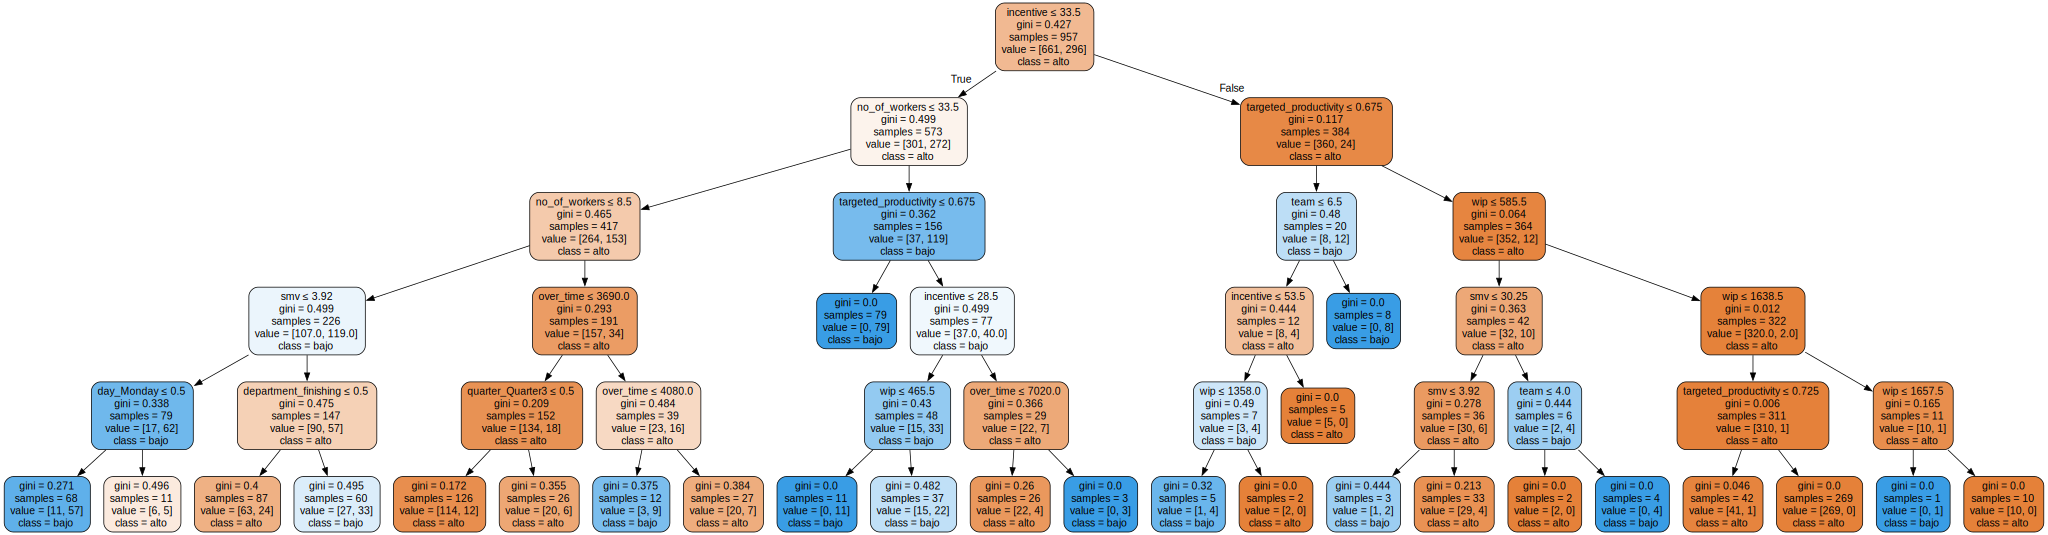

In [123]:
from sklearn import tree
import graphviz

# Visualizar el árbol de decisión
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=X_train_dummies.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)

# Guardar el archivo .dot
dot_file_path = 'arbol_decision.dot'
with open(dot_file_path, "w") as f:
    f.write(dot_data)

# Guardar el archivo .pdf
pdf_file_path = 'arbol_decision'
graph.render(pdf_file_path)

graph


In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test_td, y_pred_td)

print("Precisión del modelo árbol de decisión:", accuracy)
print(confusion_matrix(y_test_td, y_pred_td))

Precisión del modelo árbol de decisión: 0.85
[[147  23]
 [ 13  57]]


<h2>Importancia De Las Características En El Árbol De Decisión</h2>

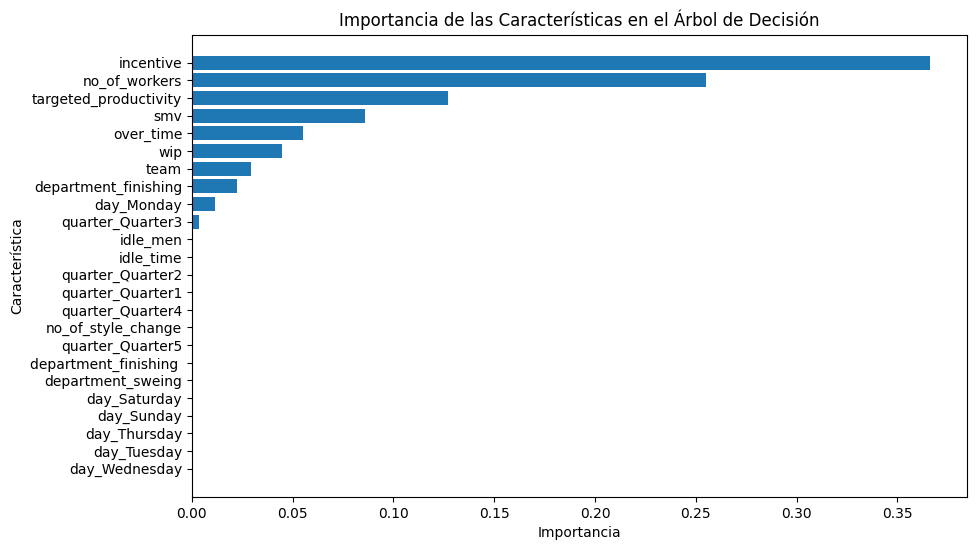

In [125]:
# Se construye este gráfico para visualizar la importancia de las características.
# Esto nos permitirá tomar decisiones informadas sobre el valor que aporta cada columna al modelo y determinar si alguna puede ser eliminada.

# Importancia de las características
feature_importances = clf.feature_importances_

# DataFrame importancia de las características
feature_importance_df = pd.DataFrame(
    {"feature": X_train_dummies.columns, "importance": feature_importances}
)

# Ordenar el DataFrame - descendente
feature_importance_df = feature_importance_df.sort_values(
    by="importance", ascending=False
)

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["feature"], feature_importance_df["importance"])
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.title("Importancia de las Características en el Árbol de Decisión")
plt.gca().invert_yaxis()
plt.show()

<p>Con este gráfico podemos ajustar nuestras variables independientes o características, eliminando aquellas que no aportan significativamente al modelo. Es importante mencionar que el árbol de decisión tiene una profundidad de 5, segun el analices previo es la profundidad optima. Por lo tanto, las características con un índice de importancia bajo no contribuyen de manera relevante al modelo y pueden ser descartadas. Esto ayuda a simplificar el modelo.</p>

# Acción 5: Conclusiones.

- El modelo de regresión lineal desarrollado para predecir la productividad real de los trabajadores no ha mostrado un buen desempeño. Los resultados indican que el modelo no es eficaz, como se evidencia en la métrica R², que presenta un valor negativo. Además, los errores cuadráticos medios (MSE y RMSE) indican que las predicciones están significativamente alejadas de los valores reales. La visualización del diagrama de dispersión revela que las predicciones están muy concentradas en un rango específico (aproximadamente de 0.70 a 0.76), lo que sugiere que hace falta ajustar el modelo. El modelo necesita una revisión de las características utilizadas o un cambio en el tipo de modelo que mejor se adapte a los datos del conjunto.

- Para el modelo de regresión logística, observamos una tendencia a predecir únicamente la clase 'alto' en el nivel de productividad. Esto sugiere que las características utilizadas podrían ser insuficientes o que necesitamos evaluar problemas de sobreajuste o desbalanceo de clases, como se menciona en la literatura. Aunque el modelo presenta una precisión superior al 70%, lo cual indica un desempeño moderado, esta métrica puede ser engañosa debido al sesgo mencionado. Alternativamente, podríamos considerar utilizar otro modelo que se ajuste mejor a los datos disponibles.

- En el modelo de KNN, observamos que este modelo si presenta predicciones para la clase 'bajo' en el nivel de productividad, aunque de manera algo pobre, según se refleja en la matriz de confusión. Su precisión fue aproximadamente del 63%. Aunque no fue óptimo en sus métricas, podemos decir que el modelo KNN tiene un desempeño más equilibrado comparado con el modelo de regresión logística, prediciendo tanto la clase 'alto' como 'bajo' de productividad. Además, hay margen para mejorar las predicciones de la clase 'bajo' mediante técnicas como el balanceo de clases, ajustes de parámetros y la adición de más características, entre otros, mencionados en la literatura.

- Por último, el modelo de árbol de decisión ha demostrado ser mejor a los modelos anteriores. En este modelo se utilizaron todas las características disponibles en el conjunto de datos, lo que aportó mayor información. Además, observamos un buen equilibrio, la matriz de confusión revela que la predicción de las clases 'alto' y 'bajo' tuvo 147 verdaderos positivos, 57 verdaderos negativos, 23 falsos negativos y 13 falsos positivos. Aunque el modelo presenta un buen desempeño, aún hay margen para mejorar las predicciones de la clase 'bajo' mediante ajustes adicionales y el balanceo de clases, En adición, se realizo un análisis de importancia de características, donde pudimos identificar y plantear una reducción futura para aquellas columnas del dataset que no aportan significativamente al modelo.

# Referencias

<p>Maimon, O. Z., y Rokach, L. (2014). Data mining with decision trees: theory and applications (Vol. 81). World scientific.</p>
<p>Murphy, K. P. (2012). Machine learning: a probabilistic perspective. MIT press.</p>
<p>Nikolas, R. A., y Deiver, A. C. (2020). Operación de un manipulador mitsubishi rv-m1 implementando una interfaz bci. Descargado de https://ciencia.lasalle.edu.co/ing_automatizacion/773</p>